In [1]:
! pip install codecarbon

In [2]:
! curl ipinfo.io

{
  "ip": "34.90.110.17",
  "hostname": "17.110.90.34.bc.googleusercontent.com",
  "city": "Groningen",
  "region": "Groningen",
  "country": "NL",
  "loc": "53.2192,6.5667",
  "org": "AS396982 Google LLC",
  "postal": "9711",
  "timezone": "Europe/Amsterdam",
  "readme": "https://ipinfo.io/missingauth"
}

In [3]:
from numpy import mean
from numpy import std
import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras import backend as K
from keras import layers
from codecarbon import track_emissions
import matplotlib.pyplot as plt
import csv

In [4]:
print(K.backend())

tensorflow


[codecarbon INFO @ 20:42:14] offline tracker init
[codecarbon INFO @ 20:42:14] [setup] RAM Tracking...
[codecarbon INFO @ 20:42:14] [setup] GPU Tracking...
[codecarbon INFO @ 20:42:14] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 20:42:14] [setup] CPU Tracking...
[codecarbon WARNING @ 20:42:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 20:42:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 20:42:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 20:42:16] >>> Tracker's metadata:
[codecarbon INFO @ 20:42:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 20:42:16]   Python version: 3.10.12
[codecarbon INFO @ 20:42:16]   CodeCarbon version: 2.3.2
[codecarbon INFO @ 20:42:16]   Available RAM : 12.675 GB
[codecarbon INFO @ 20:42:16]   CPU count: 2
[codecarbon INFO @ 20:42:16]   CPU model: Intel(R) Xeon(R) 

Epoch 1/3
1250/1250 - 12s - loss: 0.1532 - accuracy: 0.9546 - val_loss: 0.0755 - val_accuracy: 0.9775 - 12s/epoch - 10ms/step
Epoch 2/3


[codecarbon INFO @ 20:42:31] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:42:31] Energy consumed for all GPUs : 0.000118 kWh. Total GPU Power : 28.342179332335988 W
[codecarbon INFO @ 20:42:31] Energy consumed for all CPUs : 0.000178 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:42:31] 0.000316 kWh of electricity used since the beginning.


1250/1250 - 9s - loss: 0.0579 - accuracy: 0.9832 - val_loss: 0.0578 - val_accuracy: 0.9828 - 9s/epoch - 7ms/step
Epoch 3/3
1250/1250 - 6s - loss: 0.0356 - accuracy: 0.9896 - val_loss: 0.0592 - val_accuracy: 0.9836 - 6s/epoch - 5ms/step


[codecarbon INFO @ 20:42:46] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:42:46] Energy consumed for all GPUs : 0.000242 kWh. Total GPU Power : 29.878233006121803 W
[codecarbon INFO @ 20:42:46] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:42:46] 0.000636 kWh of electricity used since the beginning.


625/625 - 1s - loss: 0.0592 - accuracy: 0.9836 - 1s/epoch - 2ms/step
> 98.355


[codecarbon INFO @ 20:43:01] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:43:01] Energy consumed for all GPUs : 0.000360 kWh. Total GPU Power : 28.259913475662582 W
[codecarbon INFO @ 20:43:01] Energy consumed for all CPUs : 0.000532 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:43:01] 0.000952 kWh of electricity used since the beginning.


Epoch 1/3
1250/1250 - 6s - loss: 0.1454 - accuracy: 0.9555 - val_loss: 0.0756 - val_accuracy: 0.9770 - 6s/epoch - 5ms/step
Epoch 2/3
1250/1250 - 5s - loss: 0.0560 - accuracy: 0.9828 - val_loss: 0.0585 - val_accuracy: 0.9824 - 5s/epoch - 4ms/step
Epoch 3/3


[codecarbon INFO @ 20:43:16] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:43:16] Energy consumed for all GPUs : 0.000490 kWh. Total GPU Power : 31.10096949781282 W
[codecarbon INFO @ 20:43:16] Energy consumed for all CPUs : 0.000709 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:43:16] 0.001278 kWh of electricity used since the beginning.


1250/1250 - 6s - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0566 - val_accuracy: 0.9835 - 6s/epoch - 5ms/step
625/625 - 1s - loss: 0.0566 - accuracy: 0.9835 - 1s/epoch - 2ms/step
> 98.350
Epoch 1/3


[codecarbon INFO @ 20:43:31] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:43:31] Energy consumed for all GPUs : 0.000615 kWh. Total GPU Power : 30.052397763799274 W
[codecarbon INFO @ 20:43:31] Energy consumed for all CPUs : 0.000886 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:43:31] 0.001600 kWh of electricity used since the beginning.


1250/1250 - 7s - loss: 0.1460 - accuracy: 0.9568 - val_loss: 0.0789 - val_accuracy: 0.9765 - 7s/epoch - 6ms/step
Epoch 2/3
1250/1250 - 5s - loss: 0.0538 - accuracy: 0.9842 - val_loss: 0.0590 - val_accuracy: 0.9816 - 5s/epoch - 4ms/step
Epoch 3/3
1250/1250 - 6s - loss: 0.0307 - accuracy: 0.9911 - val_loss: 0.0584 - val_accuracy: 0.9822 - 6s/epoch - 5ms/step
625/625 - 1s - loss: 0.0584 - accuracy: 0.9822 - 1s/epoch - 2ms/step
> 98.220


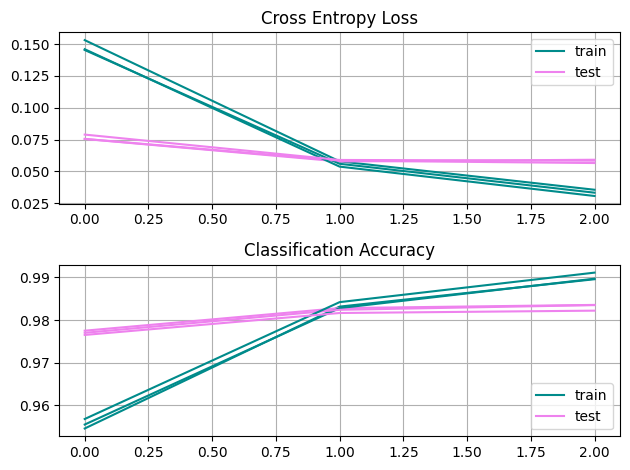

Accuracy: mean=98.308 std=0.062, n=3


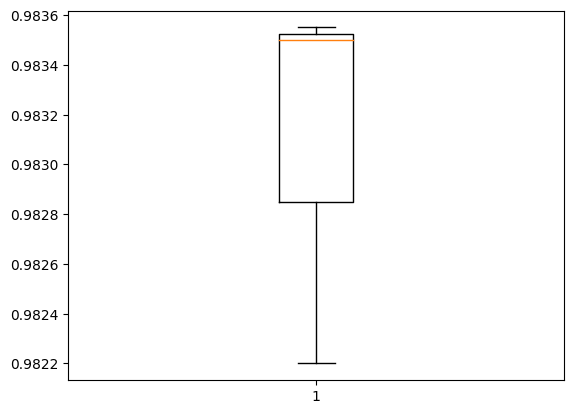

[codecarbon INFO @ 20:43:44] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 20:43:44] Energy consumed for RAM : 0.000116 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:43:44] Energy consumed for all GPUs : 0.000729 kWh. Total GPU Power : 31.290603684566197 W
[codecarbon INFO @ 20:43:44] Energy consumed for all CPUs : 0.001041 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:43:44] 0.001887 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:43:44] Done!

[codecarbon INFO @ 20:43:44] offline tracker init
[codecarbon INFO @ 20:43:44] [setup] RAM Tracking...
[codecarbon INFO @ 20:43:44] [setup] GPU Tracking...
[codecarbon INFO @ 20:43:44] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 20:43:44] [setup] CPU Tracking...
[codecarbon WARNING @ 20:43:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 20:43:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but 

Epoch 1/3
1250/1250 - 7s - loss: 0.1488 - accuracy: 0.9556 - val_loss: 0.0702 - val_accuracy: 0.9790 - 7s/epoch - 5ms/step
Epoch 2/3
1250/1250 - 5s - loss: 0.0577 - accuracy: 0.9827 - val_loss: 0.0576 - val_accuracy: 0.9820 - 5s/epoch - 4ms/step
Epoch 3/3


[codecarbon INFO @ 20:44:01] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:44:01] Energy consumed for all GPUs : 0.000131 kWh. Total GPU Power : 31.49893300414773 W
[codecarbon INFO @ 20:44:01] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:44:01] 0.000328 kWh of electricity used since the beginning.


1250/1250 - 5s - loss: 0.0357 - accuracy: 0.9891 - val_loss: 0.0622 - val_accuracy: 0.9807 - 5s/epoch - 4ms/step
625/625 - 2s - loss: 0.0622 - accuracy: 0.9807 - 2s/epoch - 4ms/step
> 98.070
Epoch 1/3
1250/1250 - 6s - loss: 0.1434 - accuracy: 0.9564 - val_loss: 0.0735 - val_accuracy: 0.9779 - 6s/epoch - 5ms/step
Epoch 2/3


[codecarbon INFO @ 20:44:16] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:44:16] Energy consumed for all GPUs : 0.000261 kWh. Total GPU Power : 31.255232714151994 W
[codecarbon INFO @ 20:44:16] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:44:16] 0.000655 kWh of electricity used since the beginning.


1250/1250 - 5s - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0621 - val_accuracy: 0.9814 - 5s/epoch - 4ms/step
Epoch 3/3
1250/1250 - 5s - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0521 - val_accuracy: 0.9847 - 5s/epoch - 4ms/step
625/625 - 1s - loss: 0.0521 - accuracy: 0.9847 - 1s/epoch - 2ms/step
> 98.475
Epoch 1/3


[codecarbon INFO @ 20:44:31] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:44:31] Energy consumed for all GPUs : 0.000393 kWh. Total GPU Power : 31.704827811199667 W
[codecarbon INFO @ 20:44:31] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:44:31] 0.000984 kWh of electricity used since the beginning.


1250/1250 - 7s - loss: 0.1425 - accuracy: 0.9574 - val_loss: 0.0767 - val_accuracy: 0.9769 - 7s/epoch - 6ms/step
Epoch 2/3
1250/1250 - 6s - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0627 - val_accuracy: 0.9806 - 6s/epoch - 5ms/step
Epoch 3/3
1250/1250 - 5s - loss: 0.0306 - accuracy: 0.9917 - val_loss: 0.0588 - val_accuracy: 0.9824 - 5s/epoch - 4ms/step


[codecarbon INFO @ 20:44:46] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:44:46] Energy consumed for all GPUs : 0.000525 kWh. Total GPU Power : 31.514778196752857 W
[codecarbon INFO @ 20:44:46] Energy consumed for all CPUs : 0.000709 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:44:46] 0.001313 kWh of electricity used since the beginning.


625/625 - 1s - loss: 0.0588 - accuracy: 0.9824 - 1s/epoch - 2ms/step
> 98.240


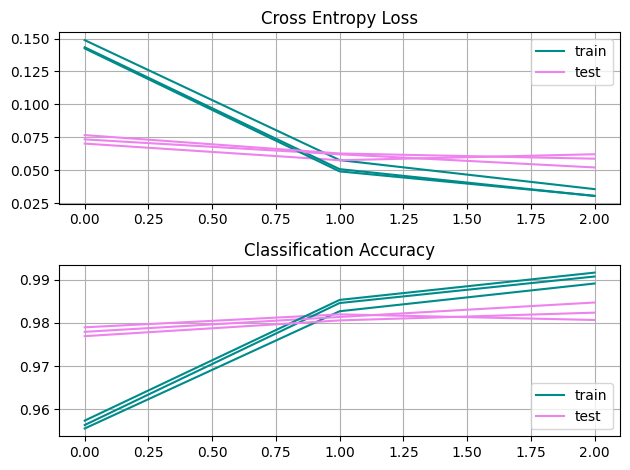

Accuracy: mean=98.262 std=0.166, n=3


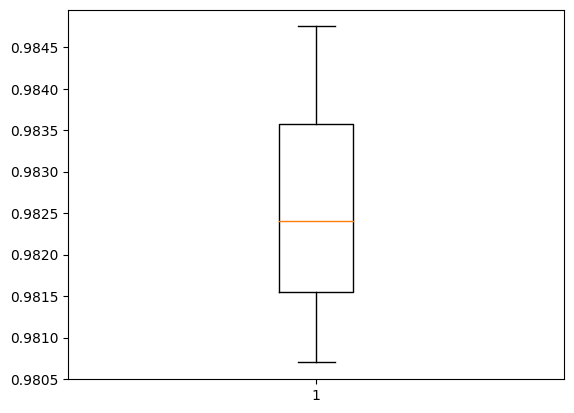

[codecarbon INFO @ 20:44:48] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 20:44:48] Energy consumed for RAM : 0.000083 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:44:48] Energy consumed for all GPUs : 0.000546 kWh. Total GPU Power : 28.955644820712173 W
[codecarbon INFO @ 20:44:48] Energy consumed for all CPUs : 0.000739 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:44:48] 0.001368 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:44:48] Done!

[codecarbon INFO @ 20:44:48] offline tracker init
[codecarbon INFO @ 20:44:48] [setup] RAM Tracking...
[codecarbon INFO @ 20:44:48] [setup] GPU Tracking...
[codecarbon INFO @ 20:44:48] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 20:44:48] [setup] CPU Tracking...
[codecarbon WARNING @ 20:44:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 20:44:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but 

Epoch 1/3
1250/1250 - 6s - loss: 0.1498 - accuracy: 0.9561 - val_loss: 0.0803 - val_accuracy: 0.9755 - 6s/epoch - 5ms/step
Epoch 2/3
1250/1250 - 5s - loss: 0.0605 - accuracy: 0.9811 - val_loss: 0.0740 - val_accuracy: 0.9762 - 5s/epoch - 4ms/step
Epoch 3/3


[codecarbon INFO @ 20:45:05] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:45:05] Energy consumed for all GPUs : 0.000135 kWh. Total GPU Power : 32.33366659819692 W
[codecarbon INFO @ 20:45:05] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:45:05] 0.000332 kWh of electricity used since the beginning.


1250/1250 - 5s - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0549 - val_accuracy: 0.9836 - 5s/epoch - 4ms/step
625/625 - 1s - loss: 0.0549 - accuracy: 0.9836 - 1s/epoch - 2ms/step
> 98.355
Epoch 1/3
1250/1250 - 7s - loss: 0.1496 - accuracy: 0.9561 - val_loss: 0.0749 - val_accuracy: 0.9782 - 7s/epoch - 5ms/step
Epoch 2/3


[codecarbon INFO @ 20:45:20] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:45:20] Energy consumed for all GPUs : 0.000268 kWh. Total GPU Power : 32.0468567499505 W
[codecarbon INFO @ 20:45:20] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:45:20] 0.000662 kWh of electricity used since the beginning.


1250/1250 - 5s - loss: 0.0546 - accuracy: 0.9836 - val_loss: 0.0628 - val_accuracy: 0.9804 - 5s/epoch - 4ms/step
Epoch 3/3
1250/1250 - 6s - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.0536 - val_accuracy: 0.9843 - 6s/epoch - 5ms/step
625/625 - 1s - loss: 0.0536 - accuracy: 0.9843 - 1s/epoch - 2ms/step
> 98.430
Epoch 1/3
1250/1250 - 6s - loss: 0.1573 - accuracy: 0.9521 - val_loss: 0.0910 - val_accuracy: 0.9714 - 6s/epoch - 5ms/step
Epoch 2/3


[codecarbon INFO @ 20:45:35] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:45:35] Energy consumed for all GPUs : 0.000402 kWh. Total GPU Power : 32.07092038465895 W
[codecarbon INFO @ 20:45:35] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:45:35] 0.000992 kWh of electricity used since the beginning.


1250/1250 - 6s - loss: 0.0584 - accuracy: 0.9832 - val_loss: 0.0749 - val_accuracy: 0.9764 - 6s/epoch - 5ms/step
Epoch 3/3
1250/1250 - 5s - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0580 - val_accuracy: 0.9823 - 5s/epoch - 4ms/step
625/625 - 1s - loss: 0.0580 - accuracy: 0.9823 - 1s/epoch - 2ms/step
> 98.235


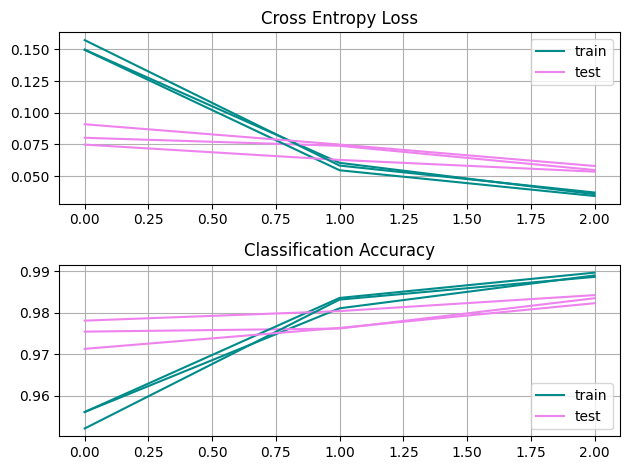

Accuracy: mean=98.340 std=0.080, n=3


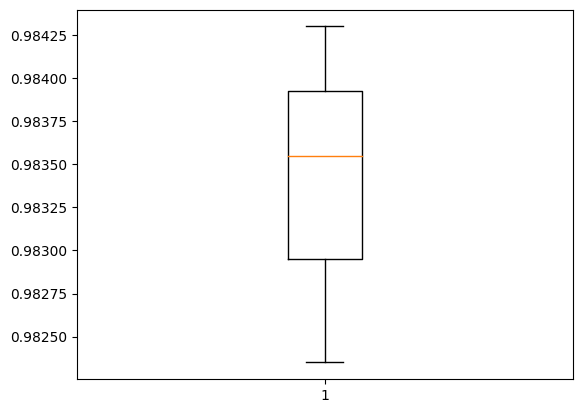

[codecarbon INFO @ 20:45:47] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 20:45:47] Energy consumed for RAM : 0.000075 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 20:45:47] Energy consumed for all GPUs : 0.000511 kWh. Total GPU Power : 32.51496167850963 W
[codecarbon INFO @ 20:45:47] Energy consumed for all CPUs : 0.000674 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:45:47] 0.001261 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:45:47] Done!



In [5]:
# cnn model with batch normalization for mnist
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=3):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=42)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=3, batch_size=32, validation_data=(testX, testY), verbose=2)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=2)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.tight_layout()
		plt.subplot(2, 1, 1)
		plt.grid()
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='darkcyan', label='train')
		plt.plot(histories[i].history['val_loss'], color='violet', label='test')
		handles, labels = plt.gca().get_legend_handles_labels()
		by_label = dict(zip(labels, handles))
		plt.legend(by_label.values(), by_label.keys(),loc="upper right")

		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.grid()
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='darkcyan', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='violet', label='test')
		handles, labels = plt.gca().get_legend_handles_labels()
		by_label = dict(zip(labels, handles))
		plt.legend(by_label.values(), by_label.keys(),loc="lower right")
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# save model performance to file
def save_performance_to_csv(scores):
	# print summary
	with open ("accuracy_scores_gpu_colab_25_12.csv",'a') as f:
		data = ["DAMI II Project Colab GPU TF", round(mean(scores)*100, 3), round(std(scores)*100, 3)]
		writer = csv.writer(f)
		writer.writerow(data)

# run the test harness for evaluating a model

@track_emissions(offline=True, country_iso_code="NLD", project_name = "DAMI II Project Colab GPU TF")
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
  # print accuracy scores to csv
	save_performance_to_csv(scores)


# run the test harness three times
i=0
while i<3:
	run_test_harness()
	i+=1